### Importando dataset e atribuindo valores nulos como "unknown"

In [97]:
import pandas as pd
import numpy as np
import spacy 
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.manifold import TSNE
import random
import matplotlib.patches as mpatches

In [98]:
df = pd.read_csv("D:/CORD-19-Dataset-Analysis-GuilhermeSouza/2022-06-02/metadata.csv")

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_13240\1066973548.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/CORD-19-Dataset-Analysis-GuilhermeSouza/2022-06-02/metadata.csv")


### Utilizando DBSCAN para clustering de artigos parecidos

In [99]:
nlp=spacy.load('en_core_web_sm')
sent_vecs={}
docs=[]
for i in tqdm(df['title'].fillna('unknown')[:5000]):
    doc=nlp((i)) 
    docs.append(doc)
    sent_vecs.update({i :doc.vector})

100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [00:23<00:00, 210.97it/s]


In [100]:
sent_vecs

{'Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia': array([ 0.46491483, -0.23037572, -0.11363092, -0.24937414,  0.291548  ,
        -0.38539138,  0.23012953,  0.13672863,  0.40498435, -0.05765004,
        -0.19174561, -0.3122784 ,  0.09409896, -0.10879082, -0.3030908 ,
        -0.21724634, -0.37139326,  0.07048538, -0.81626624,  0.1972581 ,
         0.29488203, -0.27033967, -0.05930503,  0.24162865, -0.04087383,
         0.14907452,  0.44778392,  0.1083344 , -0.23615246, -0.21065341,
         0.24506253, -0.33266047, -0.27219394, -0.27259892, -0.08520498,
        -0.18867306,  0.22631149,  0.3936007 , -0.12572175, -0.4144855 ,
        -0.47860447, -0.13665156, -0.2401331 , -0.02774999,  0.32163668,
        -0.12127931,  0.30851373, -0.32971564,  0.33917415, -0.09690426,
         0.10159432, -0.42616   ,  0.00648526, -0.15255813, -0.03655819,
         0.03169847,  0.7717894 ,  0.15735328, -0.21658395,  0.00

In [101]:
docs

[Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia,
 Nitric oxide: a pro-inflammatory mediator in lung disease?,
 Surfactant protein-D and pulmonary host defense,
 Role of endothelin-1 in lung disease,
 Gene expression in epithelial cells in response to pneumovirus infection,
 Sequence requirements for RNA strand transfer during nidovirus discontinuous subgenomic RNA synthesis,
 Debate: Transfusing to normal haemoglobin levels will not improve outcome,
 The 21st International Symposium on Intensive Care and Emergency Medicine, Brussels, Belgium, 20-23 March 2001,
 Heme oxygenase-1 and carbon monoxide in pulmonary medicine,
 Technical Description of RODS: A Real-time Public Health Surveillance System,
 Conservation of polyamine regulation by translational frameshifting from yeast to mammals,
 Heterogeneous nuclear ribonucleoprotein A1 regulates RNA synthesis of a cytoplasmic virus,
 A Method to Identify p62's

In [102]:
sentences=list(sent_vecs.keys())
vectors=list(sent_vecs.values())

In [103]:
x=np.array(vectors)
dbscan=DBSCAN(eps=0.08, min_samples=2,metric='cosine' ).fit(x)
df_cluster=pd.DataFrame({'sentences':sentences,'label':dbscan.labels_})

In [104]:
df_cluster.label.unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34], dtype=int64)

In [105]:
df_cluster

,sentences,label
0,Clinical features of culture-proven Mycoplasma...,-1
1,Nitric oxide: a pro-inflammatory mediator in l...,-1
2,Surfactant protein-D and pulmonary host defense,-1
3,Role of endothelin-1 in lung disease,-1
4,Gene expression in epithelial cells in respons...,-1
...,...,...
4991,Development of real-time RT-PCR for detection ...,-1
4992,"Herpesvirus strigis, a new avian herpesvirus: ...",-1
4993,Feline CD 4 molecules expressed on feline non-...,-1
4994,Studies on avian infectious bronchitis virus (...,-1


In [106]:
df_cluster[(df_cluster['label']==16)].head(20)

,sentences,label
1693,Clinical vaccine development,16
3969,Recombinant vector vaccine evolution,16


In [107]:
df_cluster[(df_cluster['label']==1)].head(30)

,sentences,label
42,Bioethical Implications of Globalization: An I...,1
65,Electrochemical Molecular Analysis Without Nuc...,1
88,The Transmissibility of Highly Pathogenic Avia...,1
94,Global Surveillance of Emerging Influenza Viru...,1
102,Rapid Identification of Malaria Vaccine Candid...,1
107,Natural Killer Cells Promote Early CD8 T Cell ...,1
109,The Restriction of Zoonotic PERV Transmission ...,1
120,Host Gene Expression Profiling of Dengue Virus...,1
136,Distinguishing Molecular Features and Clinical...,1
137,Epithelial Cell Apoptosis and Neutrophil Recru...,1


In [108]:
df_cluster[(df_cluster['label']==2)].head(20)

,sentences,label
80,The Effectiveness of Contact Tracing in Emergi...,2
365,The Impact of Contact Tracing in Clustered Pop...,2


In [109]:
df_cluster[(df_cluster['label']==3)].head(20)

,sentences,label
214,Influenza Virus (H5N1) in Live Bird Markets an...,3
3315,A Recombinant Newcastle Disease Virus (NDV) Ex...,3


In [110]:
df_cluster[(df_cluster['label']==4)].head(20)

,sentences,label
298,The infection of primary avian tracheal epithe...,4
4856,The polypeptide composition of avian infectiou...,4


In [111]:
df_cluster[(df_cluster['label']==5)].head(20)

,sentences,label
410,Virology Experts in the Boundary Zone Between ...,5
2933,Ebola Preparedness in the Netherlands: The Nee...,5


In [112]:
df_cluster[(df_cluster['label']==6)].head(20)

,sentences,label
724,"3D QSAR Pharmacophore Modeling, in Silico Scre...",6
3755,Progression of Cystic Fibrosis Lung Disease fr...,6


In [113]:
df_cluster[(df_cluster['label']==7)].head(10)

,sentences,label
752,Filovirus Tropism: Cellular Molecules for Vira...,7
2560,Preventative Vaccines for Zika Virus Outbreak:...,7


In [114]:
df_cluster[(df_cluster['label']==8)].head(10)

,sentences,label
966,ECR 2012 Book of Abstracts - A - Postergraduat...,8
1019,ECR 2011 Book of Abstracts - A - Postgraduate ...,8
1020,ECR 2011 Book of Abstracts - B - Scientific Se...,8
1154,ECR 2013 Book of Abstracts - B - Scientific Se...,8
1155,ECR 2013 Book of Abstracts - A - Postgraduate ...,8
2131,ECR 2016 Book of Abstracts - B - Scientific Se...,8


In [115]:
df_cluster[(df_cluster['label']==9)].head(10)

,sentences,label
993,Automatic Detection and Quantification of Tree...,9
3754,Dereplication by High-Performance Liquid Chrom...,9


In [116]:
df_cluster[(df_cluster['label']==10)].head(10)

,sentences,label
1273,Comparative Serological Assays for the Study o...,10
2918,Comparative Diagnostic Performance of the Gran...,10


In [117]:
df_cluster[(df_cluster['label']==11)].head(10)

,sentences,label
1296,The Neonatal Fc Receptor (FcRn) Enhances Human...,11
3346,Shell-Less Egg Syndrome (SES) Widespread in We...,11


In [118]:
df_cluster[(df_cluster['label']==12)].head(10)

,sentences,label
1335,62(ND) ASMS Conference on Mass Spectrometry an...,12
2471,61(ST) ASMS Conference on Mass Spectrometry an...,12


In [119]:
df_cluster[(df_cluster['label']==13)].head(10)

,sentences,label
1351,Characterization of Angiotensin-Converting Enz...,13
2252,Protein Kinase C-δ Mediates Shedding of Angiot...,13


In [120]:
df_cluster[(df_cluster['label']==14)].head(10)

,sentences,label
1503,Year in review 2012: Critical Care - respirato...,14
1710,Year in review 2013: critical care - respirato...,14


In [121]:
df_cluster[(df_cluster['label']==15)].head(10)

,sentences,label
1548,Involvement of the ERK pathway in the protecti...,15
4855,Effects of insertion of multiple AP-1 binding ...,15


In [122]:
df_cluster[(df_cluster['label']==16)].head(10)

,sentences,label
1693,Clinical vaccine development,16
3969,Recombinant vector vaccine evolution,16


### Aplicando redução de dimensionalidade em cada vetor de sentenças para melhor visualização dos clusters

In [126]:
vectors = np.array(vectors)
vectors = vectors[df_cluster.label != -1]

In [127]:
reshaped_vectors = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(vectors)

In [128]:
reshaped_vectors

array([[-33.196594 ,   6.261168 ],
       [ -9.345128 , -18.711884 ],
       [ 29.532467 ,   5.002833 ],
       ...,
       [-42.24371  ,  -7.884011 ],
       [-34.532776 ,  -5.8080688],
       [-42.25064  ,  -7.9257994]], dtype=float32)

In [129]:
labels = np.array(df_cluster.label)
labels = labels[labels != -1 ]

In [130]:
X = []
Y = []
for arr in reshaped_vectors:
    X.append(arr[0])
    Y.append(arr[1])

In [131]:
label_random_colors = {}
unique_labels = np.unique(labels)
for i in range(len(unique_labels)):
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    label_random_colors.update({unique_labels[i] : color})
label_random_colors

{0: '#a3167a',
 1: '#054ccd',
 2: '#772e3b',
 3: '#09ea80',
 4: '#995e92',
 5: '#b9efbd',
 6: '#e30fd5',
 7: '#a238f4',
 8: '#f612a5',
 9: '#e945c6',
 10: '#5f812e',
 11: '#efc553',
 12: '#53dafe',
 13: '#932c3e',
 14: '#335375',
 15: '#762866',
 16: '#a98610',
 17: '#ffb0d0',
 18: '#8cbda2',
 19: '#fd4d2f',
 20: '#369bdb',
 21: '#750708',
 22: '#8507b4',
 23: '#f0d81d',
 24: '#650357',
 25: '#5f7226',
 26: '#a8a3f4',
 27: '#060e18',
 28: '#f880b0',
 29: '#8e724b',
 30: '#21a159',
 31: '#75ccc8',
 32: '#9eb51f',
 33: '#1818a7',
 34: '#6ba53f'}

In [132]:
Colors_per_element = [label_random_colors[label] for label in labels]
Colors_per_element

['#a3167a',
 '#054ccd',
 '#054ccd',
 '#772e3b',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#09ea80',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#995e92',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#772e3b',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#054ccd',
 '#b9efbd',
 '#054ccd',
 '#054ccd',
 '#0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


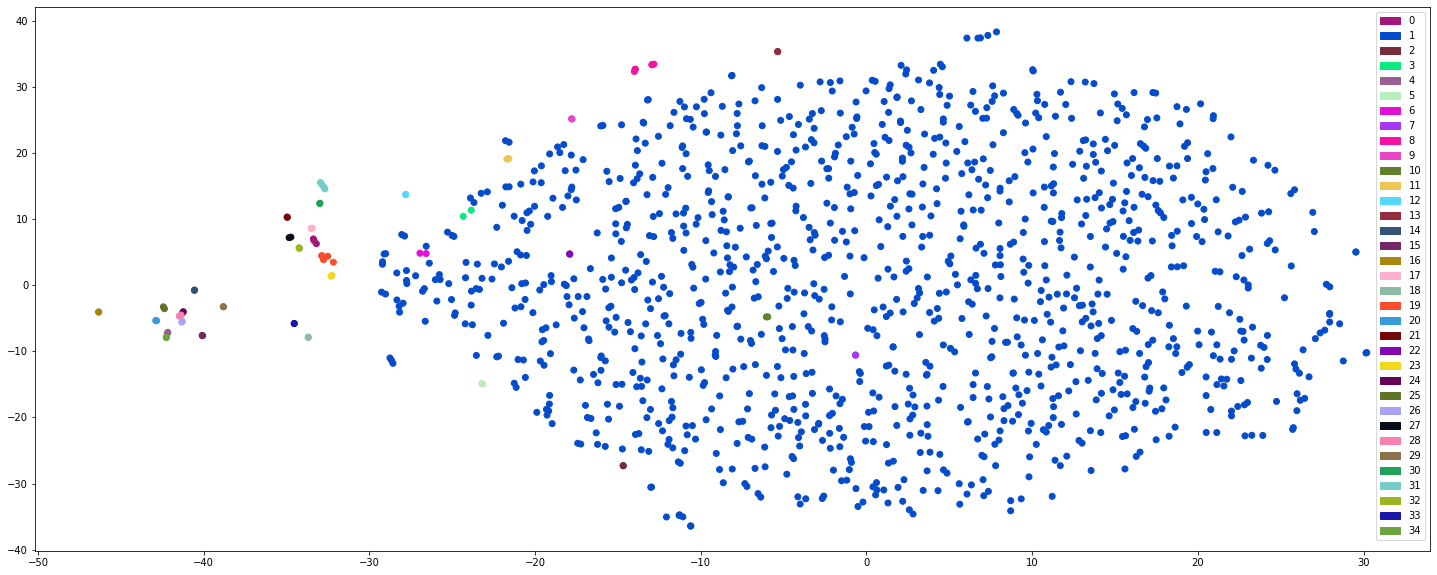

In [133]:
fig, ax = plt.subplots(figsize=(25,10))
ax.scatter(X, Y, c=Colors_per_element)
plt.legend(bbox_to_anchor = (1.15, 1.025))
patches = []
for ele in label_random_colors:
    patches.append(mpatches.Patch(color=label_random_colors[ele] , label=ele))
plt.legend(handles=patches)
plt.savefig('TSNE-DBSCAN-2DPLOT.jpg')
plt.show()
